### Problem 1

Generate 1000 points from a standard normal distribution using Box-Muller transormation
$$Z = \sqrt{-2\log U_1}\cos 2\pi U_2,~~ U_1, U_2 \sim U[0,1]$$
Plot the histogram of the points (``plt.hist``)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
u = np.random.uniform(0, 1, (1000, 2))

In [7]:
z = np.sqrt(-2*np.log(u[:,0]))*np.sin(2*np.pi*u[:,1])

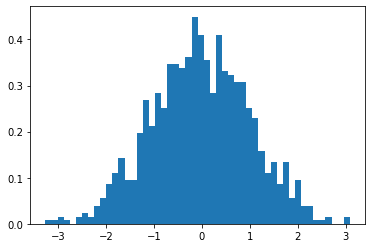

In [8]:
plt.hist(z, bins=50, density=True)
plt.show()

### Problem 2
Generate 1000 points from the distribution with the following PDF:
$$p(x) = \begin{cases}
\frac{1}{2x},~x\in [1, e^2]\\
0,~\text{otherwise}.
\end{cases}$$
Plot the histogram and compare with actual PDF.

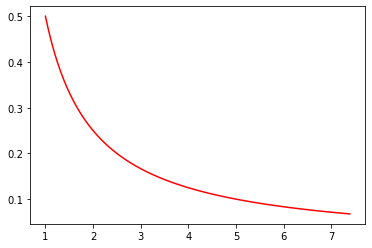

In [9]:
x_base = np.linspace(1, np.exp(2), 100)
plt.plot(x_base, 1/(2*x_base), 'r-')
plt.show()

In [16]:
def inv_cdf(x):
    return np.exp(2*x)

In [19]:
x = np.random.uniform(0, 1, 10000)
z = inv_cdf(x)

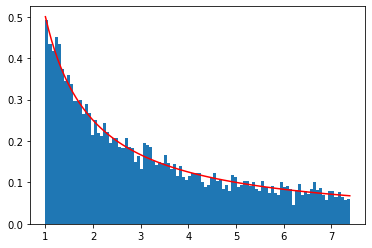

In [21]:
plt.hist(z, bins=100, density=True)
plt.plot(x_base, 1/(2*x_base), 'r-')
plt.show()

### Problem 3
Generate 1000 points from the distribution with the following PDF using rejection sampling:
$$p(x) = \frac{1}{\alpha}x\cos x, ~x\in [0; \pi/2], ~\alpha = \pi/2-1$$
Plot the histogram and compare with actual PDF.

In [22]:
alpha = np.pi/2-1
def p(x):
    return x*np.cos(x)/alpha

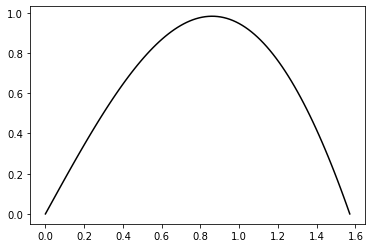

In [23]:
x_base = np.linspace(0, np.pi/2, 100)
plt.plot(x_base, p(x_base), 'k-')
plt.show()

In [25]:
def g(x):
    return 2/np.pi
M = np.pi/2

In [29]:
result = []
counter_accept, counter_total = 0, 0
while len(result) < 10000:
    x = np.random.uniform(0, np.pi/2, 1)
    counter_total += 1
    prob = p(x)/(M*g(x))
    if np.random.random() < prob:
        result.append(x)
        counter_accept += 1

0.6371049949031601


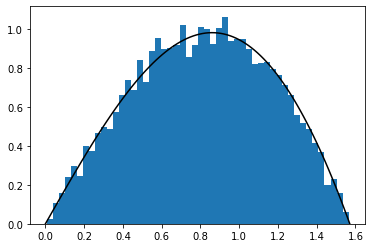

In [30]:
print(counter_accept/counter_total)
plt.hist(np.array(result), bins=50, density=True)
x_base = np.linspace(0, np.pi/2, 100)
plt.plot(x_base, p(x_base), 'k-')
plt.show()

### Problem 4
Find the value of the integral using Monte-Carlo method, compare to the actual value of the integral
$$\int_{1}^{2}xe^{-2x^2}dx$$

In [34]:
int_real = (np.exp(-2) - np.exp(-8))/4
print(int_real)

0.033749955152177546


In [32]:
def f(x):
    return x*np.exp(-2*x**2)

In [33]:
for n in [1000, 10000, 100000, 1000000]:
    x = np.random.uniform(1, 2, n)
    int_mc = np.mean(f(x))
    print(n, int_mc, np.abs((int_mc - int_real)/int_real))

1000 0.03287419786492212 0.02594839854769175
10000 0.033464249276255825 0.00846537053556018
100000 0.03356804341347823 0.005389984605285614
1000000 0.03375200623822565 6.0773000700410625e-05


In [36]:
def f1(x):
    return np.exp(-2*x**2)*1.5
def p(x):
    return x
def inv_cdf(x):
    return np.sqrt(3*x+1)

for n in [1000, 10000, 100000, 1000000]:
    z = np.random.uniform(0, 1, n)
    x = inv_cdf(z)
    int_mc = np.mean(f1(x))
    print(n, int_mc, np.abs((int_mc - int_real)/int_real))

1000 0.03447049755693857 0.021349432955158506
10000 0.03338359538433917 0.01085511865679449
100000 0.033668539881659264 0.002412307517185836
1000000 0.03358411446064403 0.004913804797243363


### Problem 5
We have an agent that behaves in the following way:
- It starts moving at the point $x=0$
- With probability 0.5 it goes right for 1 unit $x \leftarrow x+1$
- With probability 0.2 it goes left for 3 units $x \leftarrow x-3$
- with probability 0.25 it undoes the last action
- with probability 0.05 it returns to the origin

Plot the probability distribution of where the agent can end up after 100 steps. If we to set up a charging stations, where we should put those?

### Problem 6

Find the volume of a unit 3-D sphere.

Find volume of the unit 4-D sphere.
Compare to the precise value $V = \frac{\pi^2}{2}$